In [1]:
import warnings
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_colwidth', 1000)

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
np.random.seed(42)

In [6]:
df = pd.read_pickle('merged_df2.pkl')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1737
Data columns (total 26 columns):
drug_name                     1664 non-null object
generic_name                  1664 non-null object
grx_lowest_price              1664 non-null float64
grx_pharmacy                  1664 non-null object
grx_purchase                  1664 non-null object
grx_lowest_price_adj          1664 non-null float64
chem_name                     1664 non-null object
affected_organisms            1664 non-null object
chem_state                    1664 non-null object
chem_class                    1664 non-null object
drug_group                    1664 non-null object
drug_type                     1664 non-null object
chem_kingdom                  1664 non-null object
molecular_framework           1605 non-null object
avg_molecular_weight          1563 non-null float64
num_clinical_trials           1664 non-null float64
num_dosage_forms              1664 non-null float64
num_drug_interactions

In [8]:
df.describe()

,grx_lowest_price,grx_lowest_price_adj,avg_molecular_weight,num_clinical_trials,num_dosage_forms,num_drug_interactions,num_food_interactions,num_manufacturers_for_chem,num_packagers_for_chem,num_patents_on_chem,num_targets,nadac_cost_per_unit
count,1664.000,1664.000,1563.000,1664.000,1664.000,1664.000,1664.000,1664.000,1664.000,1664.000,1660.000,1664.000
mean,465.340,116.439,374.322,92.493,20.921,909.662,1.200,8.129,26.480,7.720,1.451,87.581
std,1921.493,660.313,255.318,147.040,28.019,551.098,1.363,11.586,26.965,12.126,3.558,688.608
min,0.000,0.000,18.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
25%,16.613,0.498,259.837,14.000,6.000,454.250,0.000,0.000,5.000,0.000,0.000,0.975
50%,44.870,3.172,334.165,46.000,13.000,905.000,1.000,2.000,17.500,4.000,0.000,5.328
75%,257.685,28.292,418.972,111.250,26.000,1314.500,2.000,13.000,43.000,9.000,1.000,15.830
max,31215.000,20386.000,4113.641,1635.000,431.000,2388.000,6.000,91.000,156.000,82.000,33.000,19885.465


In [9]:
df.columns

Index(['drug_name', 'generic_name', 'grx_lowest_price', 'grx_pharmacy',
       'grx_purchase', 'grx_lowest_price_adj', 'chem_name',
       'affected_organisms', 'chem_state', 'chem_class', 'drug_group',
       'drug_type', 'chem_kingdom', 'molecular_framework',
       'avg_molecular_weight', 'num_clinical_trials', 'num_dosage_forms',
       'num_drug_interactions', 'num_food_interactions',
       'num_manufacturers_for_chem', 'num_packagers_for_chem',
       'num_patents_on_chem', 'num_targets', 'chem_sub_class',
       'chem_super_class', 'nadac_cost_per_unit'],
      dtype='object')

In [10]:
# removed null values from the dataframe to enable linear regression with sklearn.
df = deepcopy(df[((df['num_targets'].isnull() == False) \
                  & (df['avg_molecular_weight'].isnull() == False) \
                  & (df['molecular_framework'] != 'Not Available') \
                  & (df['chem_kingdom'] != 'Not Available') \
                  & (df['chem_state'] != 'Not Available'))])

In [11]:
# checked for number of drugs remaining in dataframe after removing null values.
len(df)

1487

In [12]:
# removed all rows where the nadac_cost_per_unit was lower than grx_lowest_price.
df = deepcopy(df[df['nadac_cost_per_unit'] < df['grx_lowest_price']])

In [13]:
# checked for number of drugs remaining in dataframe
# after removing all rows where the nadac_cost_per_unit was lower than grx_lowest_price.
len(df)

1383

In [14]:
# removed all drugs from the dataframe
# that did not come in the format of tablet, capsule, ampule, caplet or pill.
df = deepcopy(df[([('tablet' in s) or ('capsule' in s) or ('ampule' in s) or ('caplet' in s) or ('pill' in s) for s in df['grx_purchase'].str.lower()])])

In [15]:
# checked for number of drugs remaining in dataframe
# after removing all drugs that did not come in the format of tablet, capsule, ampule, caplet or pill.
len(df)

1027

In [16]:
df[df['grx_lowest_price_adj'] >= 500]

,drug_name,generic_name,grx_lowest_price,grx_pharmacy,grx_purchase,grx_lowest_price_adj,chem_name,affected_organisms,chem_state,chem_class,...,num_dosage_forms,num_drug_interactions,num_food_interactions,num_manufacturers_for_chem,num_packagers_for_chem,num_patents_on_chem,num_targets,chem_sub_class,chem_super_class,nadac_cost_per_unit
1,Sovaldi,Sofosbuvir,27813.000,Costco,28 tablets of Sovaldi 400mg,993.321,Sofosbuvir,Hepatitis C Virus,Solid,Pyrimidine nucleosides,...,5.000,346.000,1.000,0.000,0.000,23.000,0.000,Pyrimidine 2\'-deoxyribonucleosides,"Nucleosides, nucleotides, and analogues",975.300
2,Sofosbuvir,Sovaldi,27728.000,Hy Vee,28 tablets of Sovaldi 400mg,990.286,Sofosbuvir,Hepatitis C Virus,Solid,Pyrimidine nucleosides,...,5.000,346.000,1.000,0.000,0.000,23.000,0.000,Pyrimidine 2\'-deoxyribonucleosides,"Nucleosides, nucleotides, and analogues",975.300
6,Daclatasvir,Daklinza,22351.000,Costco,30 tablets of Daklinza 30mg,745.033,Daclatasvir,Hepatitis C Virus,Solid,Carboxylic acids and derivatives,...,5.000,374.000,0.000,0.000,0.000,5.000,0.000,"Amino acids, peptides, and analogues",Organic acids and derivatives,732.038
7,Daklinza,Daclatasvir,22351.000,Hy Vee,30 tablets of Daklinza 30mg,745.033,Daclatasvir,Hepatitis C Virus,Solid,Carboxylic acids and derivatives,...,5.000,374.000,0.000,0.000,0.000,5.000,0.000,"Amino acids, peptides, and analogues",Organic acids and derivatives,732.038
9,Everolimus,Afinitor,15482.000,Costco,30 tablets of Afinitor 10mg,516.067,Everolimus,Humans and other mammals,Solid,Macrolide lactams,...,21.000,840.000,0.000,0.000,3.000,14.000,0.000,Not Available,Phenylpropanoids and polyketides,462.039
11,Sutent,Sunitinib,14570.000,Costco,28 capsules of Sutent 37.5mg,520.357,Sunitinib,Humans and other mammals,Solid,Indoles and derivatives,...,8.000,799.000,0.000,0.000,1.000,5.000,0.000,Indolines,Organoheterocyclic compounds,254.185
12,Sunitinib,Sutent,14526.000,Hy Vee,28 capsules of Sutent 37.5mg,518.786,Sunitinib,Humans and other mammals,Solid,Indoles and derivatives,...,8.000,799.000,0.000,0.000,1.000,5.000,0.000,Indolines,Organoheterocyclic compounds,254.185
41,Daraprim,Pyrimethamine,4477.000,Costco,6 tablets of Daraprim 25mg,746.167,Pyrimethamine,Plasmodium,Solid,Diazines,...,4.000,152.000,2.000,1.000,5.000,0.000,0.000,Pyrimidines and pyrimidine derivatives,Organoheterocyclic compounds,13.031
42,Pyrimethamine,Daraprim,4477.000,Hy Vee,6 tablets of Daraprim 25mg,746.167,Pyrimethamine,Plasmodium,Solid,Diazines,...,4.000,152.000,2.000,1.000,5.000,0.000,0.000,Pyrimidines and pyrimidine derivatives,Organoheterocyclic compounds,13.031


In [17]:
# created dataframes for dummy variables for chem_kingdom and chem_state.
# joined dummy variable dataframes with main dataframe.
chem_kingdom = pd.get_dummies(df['chem_kingdom'])
chem_state = pd.get_dummies(df['chem_state'])
df = deepcopy(pd.concat([df, chem_state, chem_kingdom], axis = 1, join = 'outer')).reset_index()

In [18]:
df.describe()

,index,grx_lowest_price,grx_lowest_price_adj,avg_molecular_weight,num_clinical_trials,num_dosage_forms,num_drug_interactions,num_food_interactions,num_manufacturers_for_chem,num_packagers_for_chem,num_patents_on_chem,num_targets,nadac_cost_per_unit,Liquid,Solid,Organic compounds
count,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000,1027.000
mean,927.140,455.781,15.550,362.132,90.950,18.014,1014.587,1.564,7.782,28.192,6.880,1.489,16.566,0.020,0.980,1.000
std,495.890,2200.487,77.412,178.481,136.967,19.573,521.039,1.394,10.180,25.725,11.214,3.758,66.249,0.142,0.142,0.000
min,0.000,2.000,0.067,76.055,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.016,0.000,0.000,1.000
25%,505.500,15.985,0.375,259.343,17.000,6.000,651.500,0.000,0.000,7.000,0.000,0.000,0.649,0.000,1.000,1.000
50%,977.000,37.830,0.934,326.429,47.000,12.000,986.000,1.000,3.000,22.000,4.000,0.000,3.144,0.000,1.000,1.000
75%,1352.000,184.375,4.885,414.518,111.000,22.000,1387.000,2.000,12.000,45.000,8.000,1.000,10.409,0.000,1.000,1.000
max,1737.000,31215.000,993.321,1681.890,1635.000,169.000,2388.000,6.000,51.000,113.000,82.000,33.000,975.300,1.000,1.000,1.000


In [19]:
# created new column for whether affected_organisms was 'Humans and other mammals' or not.
for i, row in enumerate(df['affected_organisms']):
    if df.loc[i, 'affected_organisms'] == 'Humans and other mammals':
        df.loc[i, 'affected_humans_other_mammals'] = 1
    else:
        df.loc[i, 'affected_humans_other_mammals'] = 0

In [20]:
# created new column for whether the drug was ever an investigational drug.
for i, row in enumerate(df['drug_group']):
    if 'Investigational' in row:
        df.loc[i, 'investigational_drug'] = 1
    else:
        df.loc[i, 'investigational_drug'] = 0

In [21]:
# created new column for whether the drug was ever an illicit drug.
for i, row in enumerate(df['drug_group']):
    if 'Illicit' in row:
        df.loc[i, 'illicit_drug'] = 1
    else:
        df.loc[i, 'illicit_drug'] = 0

In [22]:
# created new column for whether the drug was ever a veterinarian approved drug.
for i, row in enumerate(df['drug_group']):
    if 'Vet approved' in row:
        df.loc[i, 'vet_approved_drug'] = 1
    else:
        df.loc[i, 'vet_approved_drug'] = 0

In [23]:
# created new column for whether the drug was a nutraceutical drug.
for i, row in enumerate(df['drug_group']):
    if 'Nutraceutical' in row:
        df.loc[i, 'nutraceutical_drug'] = 1
    else:
        df.loc[i, 'nutraceutical_drug'] = 0

In [24]:
# created new column for whether the drug was ever withdrawn FDA approval.
for i, row in enumerate(df['drug_group']):
    if 'Withdrawn' in row:
        df.loc[i, 'withdrawn_drug'] = 1
    else:
        df.loc[i, 'withdrawn_drug'] = 0

In [25]:
# created new column for whether a generic version of the drug exists.
for i, row in enumerate(df['generic_name']):
    if row == 'Non-Existant':
        df.loc[i, 'generic_drug'] = 0
    else:
        df.loc[i, 'generic_drug'] = 1

In [26]:
# created new column for whether the molecular framework of the drug was of an aromatic type.
for i, row in enumerate(df['molecular_framework']):
    if 'Aromatic' in row:
        df.loc[i, 'aromatic_molecular_framework'] = 1
    else:
        df.loc[i, 'aromatic_molecular_framework'] = 0

In [27]:
df.columns

Index(['index', 'drug_name', 'generic_name', 'grx_lowest_price',
       'grx_pharmacy', 'grx_purchase', 'grx_lowest_price_adj', 'chem_name',
       'affected_organisms', 'chem_state', 'chem_class', 'drug_group',
       'drug_type', 'chem_kingdom', 'molecular_framework',
       'avg_molecular_weight', 'num_clinical_trials', 'num_dosage_forms',
       'num_drug_interactions', 'num_food_interactions',
       'num_manufacturers_for_chem', 'num_packagers_for_chem',
       'num_patents_on_chem', 'num_targets', 'chem_sub_class',
       'chem_super_class', 'nadac_cost_per_unit', 'Liquid', 'Solid',
       'Organic compounds', 'affected_humans_other_mammals',
       'investigational_drug', 'illicit_drug', 'vet_approved_drug',
       'nutraceutical_drug', 'withdrawn_drug', 'generic_drug',
       'aromatic_molecular_framework'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re

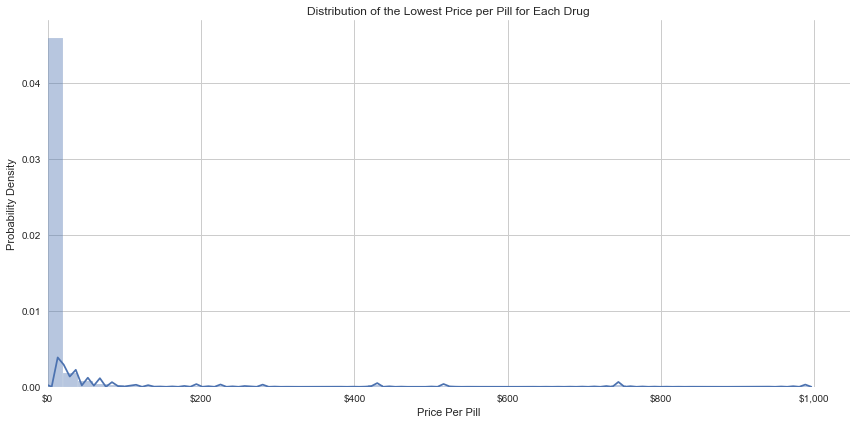

In [40]:
# created visualization for price distribution of all remaining drugs in the dataframe.
plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))

x = pd.Series(df['grx_lowest_price_adj'], name = 'grx_lowest_price_adj')
ax = sns.distplot(x)
ax.set_title("Distribution of the Lowest Price per Pill for Each Drug")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.set_ylabel('Probability Density')
ax.set_xlabel('Price Per Pill');
plt.xlim(0)

plt.tight_layout()
plt.savefig('lowest_pill_price_distribution.png')

In [32]:
df.corr()

,index,grx_lowest_price,grx_lowest_price_adj,avg_molecular_weight,num_clinical_trials,num_dosage_forms,num_drug_interactions,num_food_interactions,num_manufacturers_for_chem,num_packagers_for_chem,...,Solid,Organic compounds,affected_humans_other_mammals,investigational_drug,illicit_drug,vet_approved_drug,nutraceutical_drug,withdrawn_drug,generic_drug,aromatic_molecular_framework
index,1.000,-0.320,-0.306,-0.102,-0.138,-0.050,0.082,0.166,0.176,0.242,...,-0.036,nan,0.169,-0.135,-0.033,0.038,0.007,-0.027,0.251,0.071
grx_lowest_price,-0.320,1.000,0.832,0.112,0.062,-0.085,-0.129,-0.119,-0.128,-0.175,...,0.028,nan,-0.106,0.024,-0.031,-0.039,-0.015,0.024,-0.084,-0.002
grx_lowest_price_adj,-0.306,0.832,1.000,0.105,0.062,-0.092,-0.140,-0.113,-0.130,-0.178,...,0.028,nan,-0.145,0.039,-0.037,0.026,-0.017,-0.008,-0.016,0.042
avg_molecular_weight,-0.102,0.112,0.105,1.000,0.092,-0.046,-0.079,0.020,-0.137,-0.118,...,-0.161,nan,-0.167,0.018,-0.135,0.040,-0.019,-0.016,0.012,-0.093
num_clinical_trials,-0.138,0.062,0.062,0.092,1.000,0.381,0.157,0.106,0.163,0.175,...,-0.049,nan,0.020,0.087,-0.037,0.110,0.004,-0.065,-0.028,-0.234
num_dosage_forms,-0.050,-0.085,-0.092,-0.046,0.381,1.000,0.286,0.267,0.388,0.525,...,-0.060,nan,0.057,0.129,0.061,0.135,0.054,-0.057,-0.081,-0.012
num_drug_interactions,0.082,-0.129,-0.140,-0.079,0.157,0.286,1.000,0.357,0.383,0.341,...,-0.102,nan,0.177,0.083,0.075,0.102,-0.074,-0.010,0.006,0.081
num_food_interactions,0.166,-0.119,-0.113,0.020,0.106,0.267,0.357,1.000,0.363,0.478,...,-0.129,nan,0.011,-0.034,-0.048,0.130,-0.083,-0.040,-0.011,-0.027
num_manufacturers_for_chem,0.176,-0.128,-0.130,-0.137,0.163,0.388,0.383,0.363,1.000,0.655,...,-0.063,nan,0.010,-0.036,0.007,0.345,0.074,-0.052,0.008,-0.042
num_packagers_for_chem,0.242,-0.175,-0.178,-0.118,0.175,0.525,0.341,0.478,0.655,1.000,...,-0.028,nan,0.026,-0.029,0.081,0.292,0.007,-0.059,-0.036,-0.022


### **Train Test Split**

In [32]:
feature_names = ['avg_molecular_weight', 'num_clinical_trials',
                 'num_dosage_forms', 'num_drug_interactions',
                 'num_food_interactions', 'num_manufacturers_for_chem',
                 'num_packagers_for_chem', 'num_patents_on_chem',
                 'num_targets', 'nadac_cost_per_unit', 'Solid',
                 'affected_humans_other_mammals', 'investigational_drug',
                 'vet_approved_drug', 'illicit_drug', 'nutraceutical_drug',
                 'generic_drug', 'aromatic_molecular_framework']

X = df[feature_names]
y = df['grx_lowest_price_adj']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

### **Standard Scaler**

First use a standard scaler to level all features in the model.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create a dataframe to see scaled features.

In [35]:
df_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
df_scaled.head()

,avg_molecular_weight,num_clinical_trials,num_dosage_forms,num_drug_interactions,num_food_interactions,num_manufacturers_for_chem,num_packagers_for_chem,num_patents_on_chem,num_targets,nadac_cost_per_unit,Solid,affected_humans_other_mammals,investigational_drug,vet_approved_drug,illicit_drug,nutraceutical_drug,generic_drug,aromatic_molecular_framework
0,0.034,-0.603,-0.673,1.581,-1.116,-0.361,-0.643,-0.607,-0.382,-0.247,0.152,0.448,1.016,-0.361,-0.218,-0.099,0.253,0.435
1,0.124,-0.641,-0.476,-1.911,-1.116,0.049,0.371,-0.607,-0.382,-0.249,0.152,0.448,1.016,-0.361,-0.218,-0.099,0.253,0.435
2,-0.973,-0.473,-0.476,-0.131,-0.400,-0.053,-0.562,-0.607,-0.382,-0.053,0.152,0.448,1.016,-0.361,-0.218,-0.099,0.253,0.435
3,0.787,0.036,-0.427,-1.380,-1.116,-0.771,-0.927,-0.041,-0.382,0.145,0.152,-2.232,1.016,-0.361,-0.218,-0.099,0.253,0.435
4,-0.358,0.743,-0.230,2.126,1.032,-0.668,-0.318,-0.230,-0.382,-0.251,0.152,0.448,-0.984,-0.361,-0.218,-0.099,0.253,0.435


### **Linear Regression**

***Will multiple linear regression allow for an accurate model to predict the price per pill of prescription drugs?***

In [36]:
from sklearn.linear_model import LinearRegression

Instantiate LinearRegression() and fit our data to a new model.

In [37]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_train = linreg.predict(X_train_scaled)

*Is there a linear relationship between our training values and our predicted values?*

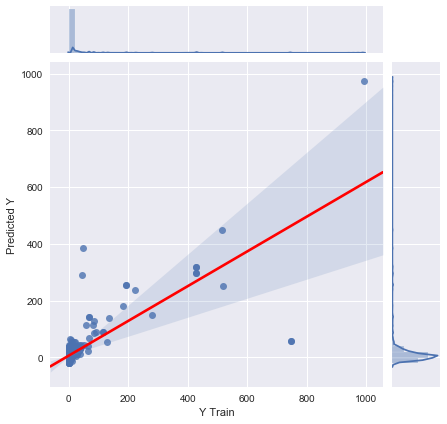

In [38]:
sns.set_style('darkgrid')

ax = sns.jointplot(x = y_train, y = y_pred_train, 
                   kind = 'reg', height = 6, ratio = 6);
ax.set_axis_labels('Y Train', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

In [39]:
from sklearn.cross_validation import cross_val_score

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Perform cross-validation to check for over-fitting/under-fitting.

In [40]:
scores = cross_val_score(linreg, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
print('Avg RMSE for 10 folds Cross-Val:        ', np.sqrt(-scores).mean().round(2))
print('Std Dev of RMSE for 10 folds Cross-Val: ', np.sqrt(-scores).std().round(2))

Avg RMSE for 10 folds Cross-Val:         38.52
Std Dev of RMSE for 10 folds Cross-Val:  33.9


In [41]:
from sklearn.utils import resample

Create a dataframe to print the effect/error of the current model.

In [42]:
print('Multiple Linear Regression Coefficients\nSimple Linear Regression, Polynomial Degree 1\nAlpha = 0')
print('Intercept:', linreg.intercept_.round(2))
err = np.std([linreg.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linreg.coef_.round(2),
                    'error': err.round(0)}, feature_names)
print('Total Non-Zero Coefficients: {}\n'.format(len(linreg.coef_.round(2))))
cdf['abs_effect'] = abs(cdf['effect'])
print(cdf.sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
Simple Linear Regression, Polynomial Degree 1
Alpha = 0
Intercept: 15.87
Total Non-Zero Coefficients: 18

                               effect  error  abs_effect
nadac_cost_per_unit            58.410  7.000      58.410
vet_approved_drug               4.950  5.000       4.950
num_drug_interactions          -2.300  3.000       2.300
num_food_interactions           1.640  3.000       1.640
num_clinical_trials            -1.450  3.000       1.450
affected_humans_other_mammals  -1.320  2.000       1.320
num_packagers_for_chem         -1.160  3.000       1.160
num_manufacturers_for_chem     -1.110  1.000       1.110
avg_molecular_weight            1.010  3.000       1.010
aromatic_molecular_framework   -0.870  1.000       0.870
Solid                           0.850  1.000       0.850
generic_drug                   -0.680  1.000       0.680
investigational_drug           -0.550  2.000       0.550
num_dosage_forms               -0.540  1.000       0.540

In [43]:
from sklearn import metrics

In [44]:
print('Train R^2:  ', linreg.score(X_train_scaled, y_train).round(2))
print('Train MAE: ', metrics.mean_absolute_error(y_train, y_pred_train).round(2))
print('Train MSE: ', metrics.mean_squared_error(y_train, y_pred_train).round(2))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(2))

Train R^2:   0.61
Train MAE:  14.55
Train MSE:  2267.08
Train RMSE: 47.61


### **Lasso Regression**

***Will multiple lasso regression allow for an accurate model to predict the price per pill of prescription drugs?***

In [45]:
from sklearn.linear_model import Lasso

In [46]:
linlasso = Lasso()
linlasso.fit(X_train_scaled, y_train)
y_pred_train = linlasso.predict(X_train_scaled)

In [47]:
from sklearn.model_selection import GridSearchCV

Perform cross-validation to optimize alpha for lasso model.

In [48]:
param_grid = {'alpha': [1e-5, 1e-3, 1e-1, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 2, 3, 4, 5, 6, 7, 8, 9,
                        10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
                        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50, 60, 70, 80, 90, 1e2, 125, 130, 135, 140,
                        145, 150, 155, 165, 170, 175, 200, 1e3, 1e4]}
grid = GridSearchCV(linlasso, param_grid, cv = 15, scoring = 'neg_mean_squared_error', n_jobs = 1)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=15, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.001, 0.1, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50, 60, 70, 80, 90, 100.0, 125, 130, 135, 140, 145, 150, 155, 165, 170, 175, 200, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [49]:
print(grid.best_params_, '\n\n', 'RMSE:', np.sqrt(-grid.best_score_))

{'alpha': 1.3} 

 RMSE: 49.3722962491771


Create new lasso model at the optimized value of alpha.

In [50]:
linlasso = Lasso(alpha = 1.3)
linlasso.fit(X_train_scaled, y_train)
y_pred_train = linlasso.predict(X_train_scaled)
y_pred_test = linlasso.predict(X_test_scaled)

*Is there a linear relationship between our training values and our predicted values?*

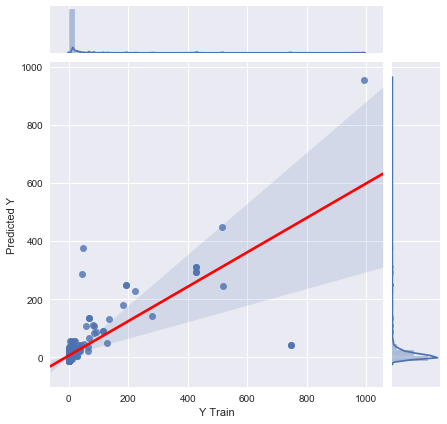

In [51]:
sns.set_style('darkgrid')

ax = sns.jointplot(x = y_train, y = y_pred_train, 
                   kind = 'reg', height = 6, ratio = 6);
ax.set_axis_labels('Y Train', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

Create a dataframe to print the effect/error of the current model.

In [52]:
print('Multiple Linear Regression Coefficients\nLasso Regression, Polynomial Degree 1\nAlpha = 1.4')
print('Intercept:', linlasso.intercept_.round(2))
err = np.std([linlasso.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linlasso.coef_.round(2),
                    'error': err.round(2)}, feature_names)
print('Total Non-Zero Coefficients: {}'.format(len(cdf[cdf['effect'] != 0]['effect'].round(2))))
print('Total Zero Coefficients: {}\n'.format(len(cdf[cdf['effect'] == 0]['effect'].round(2))))
cdf['abs_effect'] = abs(cdf['effect'])
print(cdf[cdf['effect'] != 0].sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
Lasso Regression, Polynomial Degree 1
Alpha = 1.4
Intercept: 15.87
Total Non-Zero Coefficients: 17
Total Zero Coefficients: 1

                               effect  error  abs_effect
nadac_cost_per_unit            54.760  6.400      54.760
vet_approved_drug              19.250  4.970      19.250
num_packagers_for_chem        -10.270  2.240      10.270
num_drug_interactions          -9.560  2.650       9.560
num_food_interactions           6.580  1.720       6.580
avg_molecular_weight           -5.990  1.590       5.990
affected_humans_other_mammals  -5.930  1.920       5.930
investigational_drug            5.610  1.390       5.610
num_manufacturers_for_chem     -2.970  0.920       2.970
generic_drug                    2.250  0.240       2.250
num_patents_on_chem            -1.460  0.460       1.460
num_targets                     0.800  0.280       0.800
illicit_drug                    0.660  0.190       0.660
num_clinical_trials            -0.6

In [53]:
print('Train R^2:  ', linlasso.score(X_train_scaled, y_train).round(2))
print('Train MAE: ', metrics.mean_absolute_error(y_train, y_pred_train).round(2))
print('Train MSE: ', metrics.mean_squared_error(y_train, y_pred_train).round(2))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(2))

Train R^2:   0.57
Train MAE:  12.69
Train MSE:  2289.48
Train RMSE: 47.85


### **Ridge Regression**

***Will multiple ridge regression allow for an accurate model to predict the price per pill of prescription drugs?***

In [54]:
from sklearn.linear_model import Ridge

In [55]:
linridge = Ridge()
linridge.fit(X_train_scaled, y_train)
y_pred_train = linridge.predict(X_train_scaled)
y_pred_test = linridge.predict(X_test_scaled)

In [56]:
from sklearn.model_selection import GridSearchCV

Perform cross-validation to optimize alpha for ridge model.

In [57]:
param_grid = {'alpha': [1e-4, 1e-5, 1e-3, 1e-1, 1, 5, 6, 7, 8, 9, 10,
                        11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                        21, 30, 40, 50, 60, 70, 80, 90, 1e2, 125,
                        130, 135, 140, 145, 150, 155, 165, 170, 175,
                        200, 600, 690, 691, 692, 693, 694, 695, 696,
                        697, 698, 699,700, 705, 710, 800, 825, 850,
                        874, 875, 876, 877, 888, 889, 890, 891, 892,
                        893, 894, 895, 896, 897, 898, 899, 900, 1e3, 1100, 1e4]}
grid = GridSearchCV(linridge, param_grid, cv = 15, scoring = 'neg_mean_squared_error', n_jobs = 1)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=15, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 1e-05, 0.001, 0.1, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 30, 40, 50, 60, 70, 80, 90, 100.0, 125, 130, 135, 140, 145, 150, 155, 165, 170, 175, 200, 600, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 705, 710, 800, 825, 850, 874, 875, 876, 877, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 1000.0, 1100, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [58]:
print(grid.best_params_, '\n\n', 'RMSE:', np.sqrt(-grid.best_score_))

{'alpha': 7} 

 RMSE: 49.55719262436383


Create new ridge model at the optimized value of alpha.

In [59]:
linridge = Ridge(alpha = 7)
linridge.fit(X_train_scaled, y_train)
y_pred_train = linridge.predict(X_train_scaled)
y_pred_test = linridge.predict(X_test_scaled)

*Is there a linear relationship between our training values and our predicted values?*

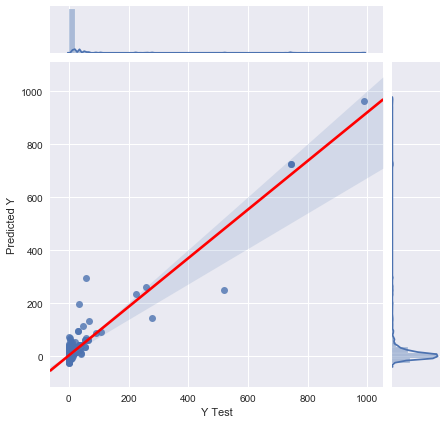

In [60]:
sns.set_style('darkgrid')

ax = sns.jointplot(x = y_test, y = y_pred_test, 
                   kind = 'reg', height = 6, ratio = 6);
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

Create a dataframe to print the effect/error of the current model.

In [61]:
print('Multiple Linear Regression Coefficients\nRIdge Regression, Polynomial Degree 1\nAlpha = 7')
print('Intercept:', linridge.intercept_.round(2))
err = np.std([linridge.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linridge.coef_.round(2),
                    'error': err.round(2)}, feature_names)
print('Total Non-Zero Coefficients: {}'.format(len(cdf[cdf['effect'] != 0]['effect'].round(2))))
print('Total Zero Coefficients: {}\n'.format(len(cdf[cdf['effect'] == 0]['effect'].round(2))))
cdf['abs_effect'] = abs(cdf['effect'])
print(cdf[cdf['effect'] != 0].sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
RIdge Regression, Polynomial Degree 1
Alpha = 7
Intercept: 15.87
Total Non-Zero Coefficients: 18
Total Zero Coefficients: 0

                               effect  error  abs_effect
nadac_cost_per_unit            52.290  6.210      52.290
vet_approved_drug               8.500  5.340       8.500
num_drug_interactions          -6.680  2.880       6.680
affected_humans_other_mammals  -3.470  2.040       3.470
num_food_interactions           3.330  2.510       3.330
num_packagers_for_chem         -2.800  2.930       2.800
num_manufacturers_for_chem     -2.750  1.340       2.750
avg_molecular_weight           -1.900  2.410       1.900
investigational_drug           -1.260  2.170       1.260
num_targets                     1.040  1.020       1.040
illicit_drug                    0.830  0.710       0.830
num_clinical_trials             0.660  2.600       0.660
aromatic_molecular_framework   -0.620  0.880       0.620
nutraceutical_drug             -0.570

In [62]:
print('Train R^2:  ', linridge.score(X_train_scaled, y_train).round(2))
print('Train MAE: ', metrics.mean_absolute_error(y_train, y_pred_train).round(2))
print('Train MSE: ', metrics.mean_squared_error(y_train, y_pred_train).round(2))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(2))

Train R^2:   0.6
Train MAE:  14.5
Train MSE:  2267.58
Train RMSE: 47.62


Chosen model for testing is multiple linear regression

*Lowest RMSE across all models.*

In [63]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_test = linreg.predict(X_test_scaled)

In [64]:
scores = cross_val_score(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error')
print('Avg RMSE for 10 folds Cross-Val:        ', np.sqrt(-scores).mean().round(2))
print('Std Dev of RMSE for 10 folds Cross-Val: ', np.sqrt(-scores).std().round(2))

Avg RMSE for 10 folds Cross-Val:         30.96
Std Dev of RMSE for 10 folds Cross-Val:  48.66


Create a dataframe to print the effect/error of the current model.

In [65]:
print('Multiple Linear Regression Coefficients\nSimple Linear Regression, Polynomial Degree 1\nAlpha = 0')
print('Intercept:', linreg.intercept_.round(2))
err = np.std([linreg.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linreg.coef_.round(2),
                    'error': err.round(0)}, feature_names)
print('Total Non-Zero Coefficients: {}\n'.format(len(linreg.coef_.round(2))))
cdf['abs_effect'] = abs(cdf['effect'])
print(cdf.sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
Simple Linear Regression, Polynomial Degree 1
Alpha = 0
Intercept: 15.87
Total Non-Zero Coefficients: 18

                               effect  error  abs_effect
nadac_cost_per_unit            58.240  6.000      58.240
vet_approved_drug              10.910  5.000      10.910
num_drug_interactions          -7.860  3.000       7.860
num_food_interactions           5.620  3.000       5.620
avg_molecular_weight           -4.230  2.000       4.230
investigational_drug            3.820  2.000       3.820
num_packagers_for_chem         -3.470  3.000       3.470
num_manufacturers_for_chem     -3.420  1.000       3.420
affected_humans_other_mammals  -3.260  2.000       3.260
num_clinical_trials             2.750  3.000       2.750
num_patents_on_chem            -2.010  2.000       2.010
num_targets                     1.750  1.000       1.750
nutraceutical_drug              1.670  1.000       1.670
aromatic_molecular_framework    1.570  1.000       1.570

In [66]:
print('Train R^2:  ', linreg.score(X_train_scaled, y_train).round(2))
print('Test  R^2:  ', linreg.score(X_test_scaled, y_test).round(2))
print('Test  MAE: ', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('Test  MSE: ', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('Test  RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))

Train R^2:   0.61
Test  R^2:   0.88
Test  MAE:  11.95
Test  MSE:  645.74
Test  RMSE: 25.41


In [67]:
# feature_names = ['avg_molecular_weight', 'num_clinical_trials',
#                  'num_dosage_forms', 'num_drug_interactions',
#                  'num_food_interactions', 'num_manufacturers_for_chem',
#                  'num_packagers_for_chem', 'num_patents_on_chem',
#                  'num_targets', 'nadac_cost_per_unit', 'Solid',
#                  'affected_humans_other_mammals', 'investigational_drug',
#                  'vet_approved_drug', 'illicit_drug', 'nutraceutical_drug',
#                  'generic_drug', 'aromatic_molecular_framework']

# X = df[feature_names]
# y = df['grx_lowest_price_adj']

In [68]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [69]:
# linreg_full = LinearRegression()
# linreg_full.fit(X_scaled, y)

In [70]:
# feature_names2 = ['Avg Molecular Weight', 'Num Clinical Trials',
#                  'Num Dosage Forms', 'Num Drug Interactions',
#                  'Num Food Interactions', 'Num Manufacturers for Chem',
#                  'Num Packagers for Chem', 'Num Patents on Chemical',
#                  'Num Targets', 'NADAC Per Unit', 'Chemical State',
#                  'Affected Humans/Other Mammals', 'Investigational Drug',
#                  'Vet Approved Drug', 'Illicit Drug', 'Nutraceutical Drug',
#                  'Generic Exists', 'Aromatic Molecular Framework']

In [71]:
# vif = pd.DataFrame()
# vif['VIF Factor'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
# vif['features'] = feature_names2

In [72]:
# vif.sort_values(by = 'VIF Factor', ascending = False)

In [73]:
# print('Train R^2:  ', linreg_full.score(X_scaled, y))

In [74]:
# feature_names = ['nadac_cost_per_unit']

# X = df[feature_names]
# y = df['grx_lowest_price_adj']

In [75]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [76]:
# linreg_nadac = LinearRegression()
# linreg_nadac.fit(X_scaled, y)

In [77]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# feature_names2 = ['NADAC Per Unit']

In [79]:
# vif = pd.DataFrame()
# vif['VIF Factor'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
# vif['features'] = feature_names2

In [80]:
# vif.sort_values(by = 'VIF Factor', ascending = False)

In [81]:
# print('Train R^2:  ', linreg_nadac.score(X_scaled, y))

### **Obtaining Beta Values from Model of Choice**

Rescaled data for all x's (without train, test, split).

In [82]:
X_scaled = scaler.transform(X)

In [83]:
linreg = LinearRegression()
linreg.fit(X_scaled, y)
y_pred = linreg.predict(X_scaled)

In [84]:
scores = cross_val_score(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error')
print('Avg RMSE for 10 folds Cross-Val:        ', np.sqrt(-scores).mean().round(2))
print('Std Dev of RMSE for 10 folds Cross-Val: ', np.sqrt(-scores).std().round(2))

Avg RMSE for 10 folds Cross-Val:         30.96
Std Dev of RMSE for 10 folds Cross-Val:  48.66


In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
feature_names2 = ['Avg Molecular Weight', 'Num Clinical Trials',
                 'Num Dosage Forms', 'Num Drug Interactions',
                 'Num Food Interactions', 'Num Manufacturers for Chem',
                 'Num Packagers for Chem', 'Num Patents on Chemical',
                 'Num Targets', 'NADAC Per Unit', 'Chemical State',
                 'Affected Humans/Other Mammals', 'Investigational Drug',
                 'Vet Approved Drug', 'Illicit Drug', 'Nutraceutical Drug',
                 'Generic Exists', 'Aromatic Molecular Framework']

In [87]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['features'] = feature_names2

In [88]:
vif.sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
6,2.433,Num Packagers for Chem
5,2.029,Num Manufacturers for Chem
2,1.783,Num Dosage Forms
1,1.451,Num Clinical Trials
4,1.444,Num Food Interactions
7,1.431,Num Patents on Chemical
3,1.413,Num Drug Interactions
13,1.256,Vet Approved Drug
11,1.186,Affected Humans/Other Mammals
0,1.138,Avg Molecular Weight


Create a dataframe to print the effect/error of the current model.

In [89]:
print('Multiple Linear Regression Coefficients\nSimple Linear Regression, Polynomial Degree 1\nAlpha = 0')
print('Intercept:', linreg.intercept_.round(2))
err = np.std([linreg.fit(*resample(X_scaled, y)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linreg.coef_.round(2),
                    'error': err.round(0)}, feature_names)
print('Total Non-Zero Coefficients: {}\n'.format(len(linreg.coef_.round(2))))
cdf['abs_effect'] = abs(cdf['effect'])
print(cdf.sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
Simple Linear Regression, Polynomial Degree 1
Alpha = 0
Intercept: 14.75
Total Non-Zero Coefficients: 18

                               effect  error  abs_effect
nadac_cost_per_unit            59.270  3.000      59.270
num_drug_interactions          -3.070  2.000       3.070
vet_approved_drug               2.660  3.000       2.660
num_dosage_forms               -1.300  1.000       1.300
num_food_interactions           1.270  2.000       1.270
investigational_drug            1.170  1.000       1.170
affected_humans_other_mammals  -0.800  1.000       0.800
num_patents_on_chem            -0.640  1.000       0.640
avg_molecular_weight           -0.490  2.000       0.490
num_packagers_for_chem         -0.430  2.000       0.430
num_clinical_trials            -0.320  2.000       0.320
generic_drug                   -0.260  1.000       0.260
num_targets                    -0.140  1.000       0.140
Solid                          -0.120  0.000       0.120

In [90]:
print('Train R^2:  ', linreg.score(X_train_scaled, y_train).round(2))
print('Test  R^2:  ', linreg.score(X_test_scaled, y_test).round(2))
print('Test  MAE: ', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('Test  MSE: ', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('Test  RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))

Train R^2:   0.6
Test  R^2:   0.91
Test  MAE:  11.95
Test  MSE:  645.74
Test  RMSE: 25.41


In [91]:
cdf.sort_values(by = 'abs_effect', ascending = False).reset_index()['index']

0               nadac_cost_per_unit
1             num_drug_interactions
2                 vet_approved_drug
3                  num_dosage_forms
4             num_food_interactions
5              investigational_drug
6     affected_humans_other_mammals
7               num_patents_on_chem
8              avg_molecular_weight
9            num_packagers_for_chem
10              num_clinical_trials
11                     generic_drug
12                      num_targets
13                            Solid
14                     illicit_drug
15               nutraceutical_drug
16       num_manufacturers_for_chem
17     aromatic_molecular_framework
Name: index, dtype: object

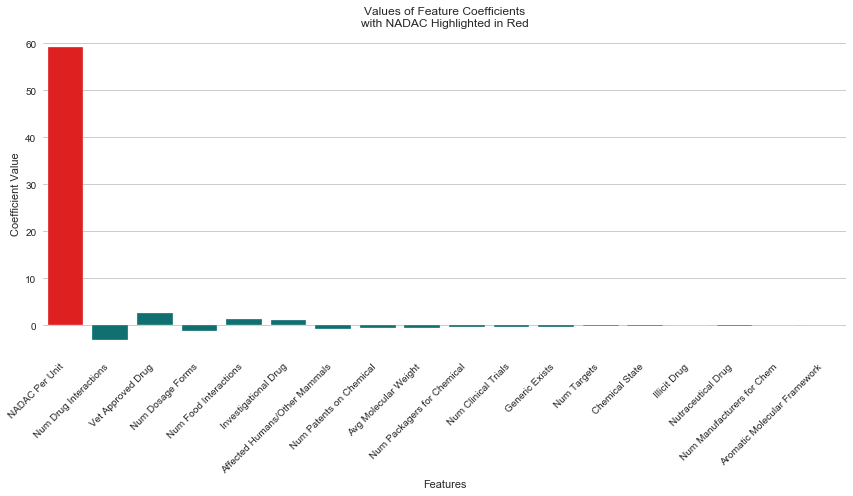

In [98]:
# graphed final beta values by feature.
features = ['NADAC Per Unit', 'Num Drug Interactions', 'Vet Approved Drug',
            'Num Dosage Forms', 'Num Food Interactions', 'Investigational Drug', 
            'Affected Humans/Other Mammals','Num Patents on Chemical','Avg Molecular Weight',
            'Num Packagers for Chemical', 'Num Clinical Trials', 'Generic Exists', 
            'Num Targets', 'Chemical State', 'Illicit Drug', 'Nutraceutical Drug',
            'Num Manufacturers for Chem', 'Aromatic Molecular Framework']

plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))

clrs = ['red' if (x == 'nadac_cost_per_unit') else 'teal' for x in cdf.sort_values(by = 'abs_effect', ascending = False).reset_index()['index']]
ax = sns.barplot(x = 'index',  y = 'effect', palette = clrs,
                 data = cdf.sort_values(by = 'abs_effect', ascending = False).reset_index(), color = 'Teal')
ax.set_title('Values of Feature Coefficients\nwith NADAC Highlighted in Red')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient Value')
ax.set_xticklabels(features, 
                   rotation = 45, ha = "right")

plt.tight_layout()
plt.savefig('coefficients_w_cost.png')

In [93]:
vif.sort_values(by = 'VIF Factor', ascending = False).reset_index()['features']

0            Num Packagers for Chem
1        Num Manufacturers for Chem
2                  Num Dosage Forms
3               Num Clinical Trials
4             Num Food Interactions
5           Num Patents on Chemical
6             Num Drug Interactions
7                 Vet Approved Drug
8     Affected Humans/Other Mammals
9              Avg Molecular Weight
10     Aromatic Molecular Framework
11                      Num Targets
12                     Illicit Drug
13                   NADAC Per Unit
14                   Chemical State
15             Investigational Drug
16               Nutraceutical Drug
17                   Generic Exists
Name: features, dtype: object

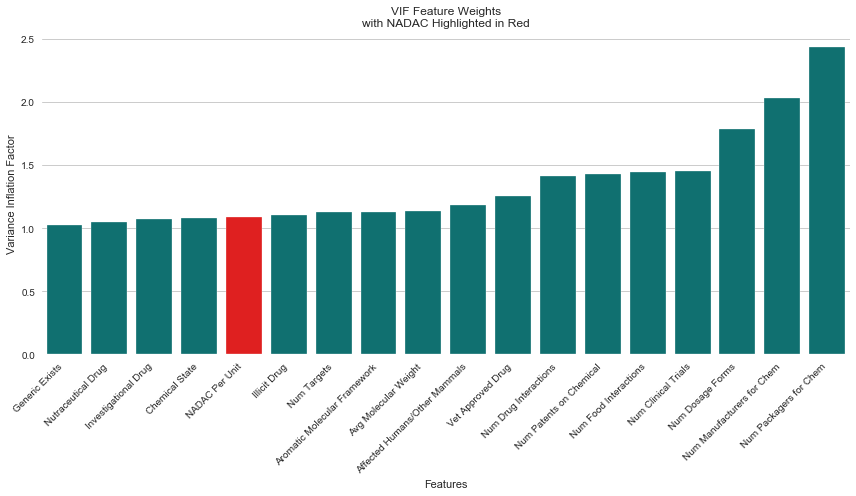

In [94]:
# graphed vif values by feature.
# features = ['Chemical State', 'Generic Exists',' Num Drug Interactions',
#             'Aromatic Molecular Framework', 'Affected Humans/Other Mammals',
#             'Num Packagers for Chemical', 'Avg Molecular Weight',
#             'Num Dosage Forms', 'Num Food Interactions','Num Manufacturers for Chem',
#             'Num Clinical Trials', 'Investigational Drug', 'Num Patents on Chemical',
#             'Vet Approved Drug', 'Num Targets', 'Illicit Drug',
#             'NADAC Per Unit', 'Nutraceutical Drug']

plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))

clrs = ['red' if (x == 'NADAC Per Unit') else 'teal' for x in vif.sort_values(by = 'VIF Factor', ascending = True).reset_index()['features']]
ax = sns.barplot(x = 'features', y = 'VIF Factor', palette = clrs,
                 data = vif.sort_values(by = 'VIF Factor', ascending = True).reset_index())
ax.set_title('VIF Feature Weights\nwith NADAC Highlighted in Red')
ax.set_xlabel('Features')
ax.set_ylabel('Variance Inflation Factor')
ax.set_xticklabels(vif.sort_values(by = 'VIF Factor', ascending = True).reset_index()['features'], 
                   rotation = 45, ha = "right")


plt.tight_layout()
plt.savefig('feature_importance_w_cost.png')

In [95]:
len(features)

18

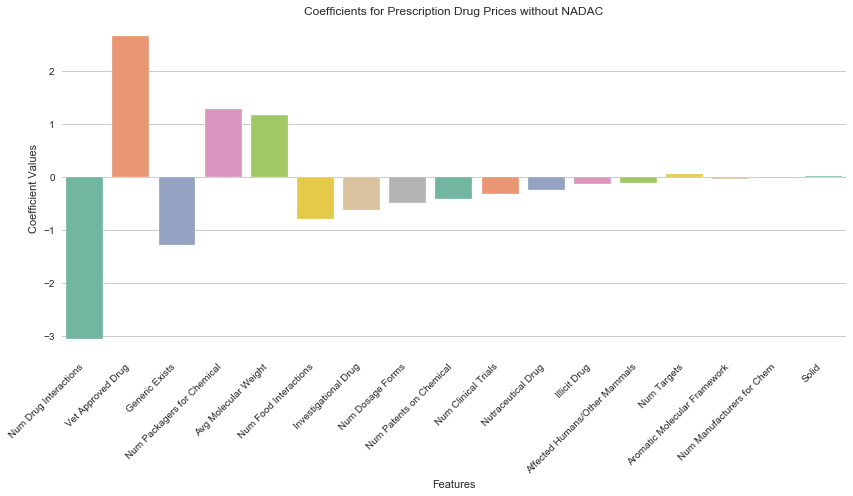

In [96]:
# graphed final beta values by feature (without pharmacy cost per unit).
features = ['NADAC per Unit', 'Num Drug Interactions', 'Vet Approved Drug',
            'Generic Exists', 'Num Packagers for Chemical', 'Avg Molecular Weight',
            'Num Food Interactions', 'Investigational Drug', 'Num Dosage Forms',
            'Num Patents on Chemical', 'Num Clinical Trials', 'Nutraceutical Drug',
            'Illicit Drug', 'Affected Humans/Other Mammals', 'Num Targets',
            'Aromatic Molecular Framework', 'Num Manufacturers for Chem', 'Solid']

plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))

ax = sns.barplot(x = 'index',  y = 'effect', 
                 data = cdf.sort_values(by = 'abs_effect', ascending = False)[1:].reset_index(), palette = 'Set2')
ax.set_title('Coefficients for Prescription Drug Prices without NADAC')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient Values')
ax.set_xticklabels(features[1:], 
                   rotation = 45, ha = "right")

plt.tight_layout()
plt.savefig('feature_importance_no_cost_feature.png')